<a href="https://colab.research.google.com/github/JamshidbekYusupov/Mohirdev_Tutorial_Codes/blob/main/SemantikSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import fastai

In [3]:
print(torch.__version__)
print(fastai.__version__)

2.4.1+cu121
2.7.17


In [4]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)

path.ls

<bound method Path.ls of Path('/root/.fastai/data/camvid_tiny')>

In [6]:
import numpy as np

In [5]:
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [18]:
def lebel_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'


#Dataloaders
dls = SegmentationDataLoaders.from_label_func(path,
                                              bs = 8,
                                              fnames = get_image_files(path/'images'),
                                              label_func=lebel_getter,
                                              codes = np.loadtxt(path/'codes.txt', dtype=str))
learn = unet_learner(dls, resnet34)
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,3.225300,2.425520,00:01


epoch,train_loss,valid_loss,time
0,2.062323,1.696459,00:01
1,1.693805,1.305894,00:01
2,1.504446,1.359021,00:01
3,1.387530,0.998627,00:01
4,1.248071,0.942651,00:01
5,1.130061,0.862780,00:01
6,1.028873,0.809942,00:01
7,0.942694,0.783005,00:01
8,0.871355,0.760985,00:01
9,0.815212,0.767749,00:01


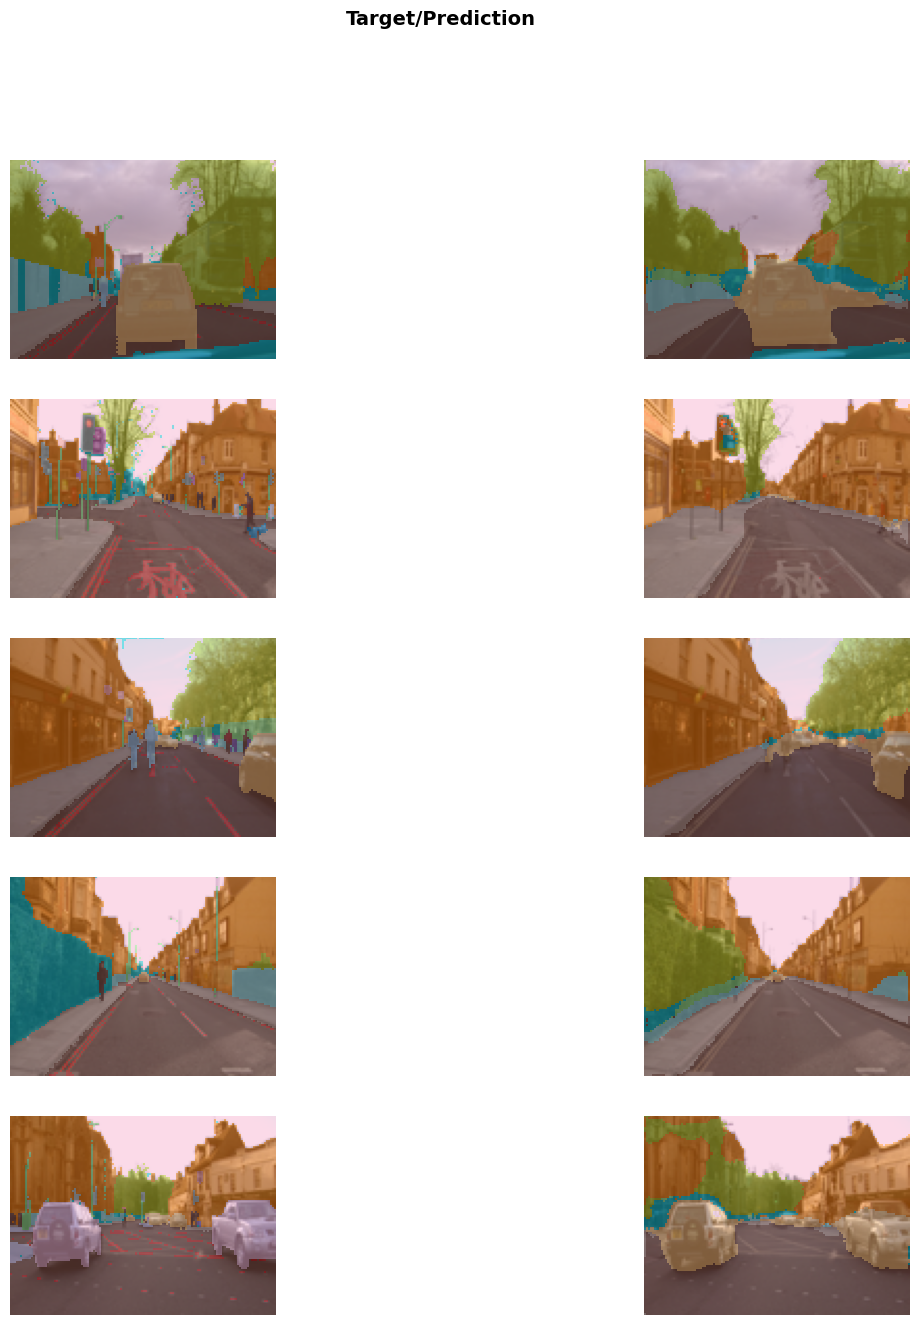

In [19]:
learn.show_results(max_n = 5, figsize = (15, 15))